## Prediction in Real Life

In [1]:
import numpy as np
import seaborn as sns
import scipy
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Export New Data

In [75]:
import pandas as pd

# 创建一个字典，包含所有的列和对应的值
data_pre = {
    'Activity Name': ['Chicago Auto Show 2024', 'Expo Chicago 2024', '2024 Chicago International Music Competition Final'],
    'Date': ['2024/2/10', '2024/4/11', '2024/7/17'],
    'Location': ['McCormick Exhibition Centre', 'United States Navy Pier, Illinois', 'Ganz Hall'],
    'Latitude': [41.883228, 41.8914, 41.8762],
    'Longitude': [-87.632401, -87.5997, -87.6254]
}

# 使用字典创建数据框
df_pre = pd.DataFrame(data_pre)

# 打印数据框
df_pre.head()

,Activity Name,Date,Location,Latitude,Longitude
0,Chicago Auto Show 2024,2024/2/10,McCormick Exhibition Centre,41.883228,-87.632401
1,Expo Chicago 2024,2024/4/11,"United States Navy Pier, Illinois",41.891400,-87.599700
2,2024 Chicago International Music Competition F...,2024/7/17,Ganz Hall,41.876200,-87.625400


In [76]:
df_pre['Date'] = pd.to_datetime(df_pre['Date'], format = '%Y/%m/%d')

df_pre['Month'] = df_pre['Date'].dt.month
df_pre['Day'] = df_pre['Date'].dt.day

df_pre.head()

,Activity Name,Date,Location,Latitude,Longitude,Month,Day
0,Chicago Auto Show 2024,2024-02-10,McCormick Exhibition Centre,41.883228,-87.632401,2,10
1,Expo Chicago 2024,2024-04-11,"United States Navy Pier, Illinois",41.891400,-87.599700,4,11
2,2024 Chicago International Music Competition F...,2024-07-17,Ganz Hall,41.876200,-87.625400,7,17


In [77]:
df_pre['Weekday'] = df_pre['Date'].dt.dayofweek
df_pre['Weekday'] = df_pre['Weekday'].replace({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
df_pre.head()

,Activity Name,Date,Location,Latitude,Longitude,Month,Day,Weekday
0,Chicago Auto Show 2024,2024-02-10,McCormick Exhibition Centre,41.883228,-87.632401,2,10,Saturday
1,Expo Chicago 2024,2024-04-11,"United States Navy Pier, Illinois",41.891400,-87.599700,4,11,Thursday
2,2024 Chicago International Music Competition F...,2024-07-17,Ganz Hall,41.876200,-87.625400,7,17,Wednesday


In [78]:
# 创建一个新的数据框，通过重复df_pre中的每一行4次
df_expanded = df_pre.loc[df_pre.index.repeat(4)].reset_index(drop=True)

# 创建一个新的列“Time”，并填入4个时间段
df_expanded['Time'] = ['Early Morning', 'Late Morning', 'Afternoon', 'Night'] * len(df_pre)

# 打印扩展后的数据框
df_expanded.head()

,Activity Name,Date,Location,Latitude,Longitude,Month,Day,Weekday,Time
0,Chicago Auto Show 2024,2024-02-10,McCormick Exhibition Centre,41.883228,-87.632401,2,10,Saturday,Early Morning
1,Chicago Auto Show 2024,2024-02-10,McCormick Exhibition Centre,41.883228,-87.632401,2,10,Saturday,Late Morning
2,Chicago Auto Show 2024,2024-02-10,McCormick Exhibition Centre,41.883228,-87.632401,2,10,Saturday,Afternoon
3,Chicago Auto Show 2024,2024-02-10,McCormick Exhibition Centre,41.883228,-87.632401,2,10,Saturday,Night
4,Expo Chicago 2024,2024-04-11,"United States Navy Pier, Illinois",41.891400,-87.599700,4,11,Thursday,Early Morning


In [79]:
df_expanded = df_expanded.drop(['Activity Name', 'Date', 'Location'], axis=1)
df_expanded.head()

,Latitude,Longitude,Month,Day,Weekday,Time
0,41.883228,-87.632401,2,10,Saturday,Early Morning
1,41.883228,-87.632401,2,10,Saturday,Late Morning
2,41.883228,-87.632401,2,10,Saturday,Afternoon
3,41.883228,-87.632401,2,10,Saturday,Night
4,41.891400,-87.599700,4,11,Thursday,Early Morning


In [80]:
df = pd.read_csv('drive/MyDrive/dataset_cleaned.csv')
df['UCR_PART'] = df['UCR_PART'].astype('category')
df['UCR_PART'] = df['UCR_PART'].cat.codes
df.head()

,Block,Primary Type,District,Ward,Community Area,Year,Latitude,Longitude,UCR_PART,Month,Day,Time,Weekday
0,035XX S INDIANA AVE,THEFT,2.0,3.0,35.0,2020,41.830482,-87.621752,0,5,7,Late Morning,Thursday
1,005XX W 32ND ST,BATTERY,9.0,11.0,60.0,2020,41.836310,-87.639624,0,4,16,Early Morning,Thursday
2,081XX S COLES AVE,ASSAULT,4.0,7.0,46.0,2020,41.747610,-87.549179,0,7,1,Late Morning,Wednesday
3,065XX S WOLCOTT AVE,BATTERY,7.0,15.0,67.0,2020,41.774878,-87.671375,0,9,27,Night,Sunday
4,081XX S LOOMIS BLVD,WEAPONS VIOLATION,6.0,21.0,71.0,2020,41.746221,-87.658477,1,8,4,Night,Tuesday


In [81]:
df = df.drop(['Block', 'Primary Type', 'Ward'], axis=1)
df.head()

,District,Community Area,Year,Latitude,Longitude,UCR_PART,Month,Day,Time,Weekday
0,2.0,35.0,2020,41.830482,-87.621752,0,5,7,Late Morning,Thursday
1,9.0,60.0,2020,41.836310,-87.639624,0,4,16,Early Morning,Thursday
2,4.0,46.0,2020,41.747610,-87.549179,0,7,1,Late Morning,Wednesday
3,7.0,67.0,2020,41.774878,-87.671375,0,9,27,Night,Sunday
4,6.0,71.0,2020,41.746221,-87.658477,1,8,4,Night,Tuesday


In [82]:
df = df.drop(['District', 'Community Area', 'Year', 'UCR_PART'], axis=1)
df.head()

,Latitude,Longitude,Month,Day,Time,Weekday
0,41.830482,-87.621752,5,7,Late Morning,Thursday
1,41.836310,-87.639624,4,16,Early Morning,Thursday
2,41.747610,-87.549179,7,1,Late Morning,Wednesday
3,41.774878,-87.671375,9,27,Night,Sunday
4,41.746221,-87.658477,8,4,Night,Tuesday


In [83]:
df_expanded.head()

,Latitude,Longitude,Month,Day,Weekday,Time
0,41.883228,-87.632401,2,10,Saturday,Early Morning
1,41.883228,-87.632401,2,10,Saturday,Late Morning
2,41.883228,-87.632401,2,10,Saturday,Afternoon
3,41.883228,-87.632401,2,10,Saturday,Night
4,41.891400,-87.599700,4,11,Thursday,Early Morning


In [84]:
df_expanded.to_csv('drive/MyDrive/output.csv', index=False)

In [67]:
# 获取数据框的列名
cols = list(df_expanded.columns)

# 调换最后两列的位置
cols[-2], cols[-1] = cols[-1], cols[-2]

# 使用新的列顺序重新索引数据框
df_expanded = df_expanded[cols]

df_expanded.head()

,Latitude,Longitude,Month,Day,Time,Weekday
0,41.883228,-87.632401,2,10,Early Morning,Saturday
1,41.883228,-87.632401,2,10,Late Morning,Saturday
2,41.883228,-87.632401,2,10,Afternoon,Saturday
3,41.883228,-87.632401,2,10,Night,Saturday
4,41.891400,-87.599700,4,11,Early Morning,Thursday


In [68]:
df = pd.concat([df, df_expanded])
df.head()

,Latitude,Longitude,Month,Day,Time,Weekday
0,41.830482,-87.621752,5,7,Late Morning,Thursday
1,41.836310,-87.639624,4,16,Early Morning,Thursday
2,41.747610,-87.549179,7,1,Late Morning,Wednesday
3,41.774878,-87.671375,9,27,Night,Sunday
4,41.746221,-87.658477,8,4,Night,Tuesday


In [69]:
from sklearn.preprocessing import LabelEncoder

# Label
labelencoder = LabelEncoder()
df['Month'] = labelencoder.fit_transform(df['Month'])
df['Weekday'] = labelencoder.fit_transform(df['Weekday'])
df['Day'] = labelencoder.fit_transform(df['Day'])

df.head()

,Latitude,Longitude,Month,Day,Time,Weekday
0,41.830482,-87.621752,4,6,Late Morning,4
1,41.836310,-87.639624,3,15,Early Morning,4
2,41.747610,-87.549179,6,0,Late Morning,6
3,41.774878,-87.671375,8,26,Night,3
4,41.746221,-87.658477,7,3,Night,5


In [70]:
# pandas.get_dummies
df = pd.get_dummies(df, columns=['Time'])

df.head()

,Latitude,Longitude,Month,Day,Weekday,Time_Afternoon,Time_Early Morning,Time_Late Morning,Time_Night
0,41.830482,-87.621752,4,6,4,False,False,True,False
1,41.836310,-87.639624,3,15,4,False,True,False,False
2,41.747610,-87.549179,6,0,6,False,False,True,False
3,41.774878,-87.671375,8,26,3,False,False,False,True
4,41.746221,-87.658477,7,3,5,False,False,False,True


In [72]:
df_expanded = df.iloc[-12:,:]

df_expanded.head()

,Latitude,Longitude,Month,Day,Weekday,Time_Afternoon,Time_Early Morning,Time_Late Morning,Time_Night
0,41.883228,-87.632401,1,9,2,False,True,False,False
1,41.883228,-87.632401,1,9,2,False,False,True,False
2,41.883228,-87.632401,1,9,2,True,False,False,False
3,41.883228,-87.632401,1,9,2,False,False,False,True
4,41.891400,-87.599700,3,10,4,False,True,False,False


In [73]:
X1 = df_expanded

X1 = X1.fillna(0)
X1 = X1.replace(True, 1)
X1 = X1.replace(False, 0)
X1.head()

,Latitude,Longitude,Month,Day,Weekday,Time_Afternoon,Time_Early Morning,Time_Late Morning,Time_Night
0,41.883228,-87.632401,1,9,2,0,1,0,0
1,41.883228,-87.632401,1,9,2,0,0,1,0
2,41.883228,-87.632401,1,9,2,1,0,0,0
3,41.883228,-87.632401,1,9,2,0,0,0,1
4,41.891400,-87.599700,3,10,4,0,1,0,0


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [37]:
df = pd.read_csv('drive/MyDrive/dataset_cleaned.csv')
df['UCR_PART'] = df['UCR_PART'].astype('category')
df['UCR_PART'] = df['UCR_PART'].cat.codes
df.head()

,Block,Primary Type,District,Ward,Community Area,Year,Latitude,Longitude,UCR_PART,Month,Day,Time,Weekday
0,035XX S INDIANA AVE,THEFT,2.0,3.0,35.0,2020,41.830482,-87.621752,0,5,7,Late Morning,Thursday
1,005XX W 32ND ST,BATTERY,9.0,11.0,60.0,2020,41.836310,-87.639624,0,4,16,Early Morning,Thursday
2,081XX S COLES AVE,ASSAULT,4.0,7.0,46.0,2020,41.747610,-87.549179,0,7,1,Late Morning,Wednesday
3,065XX S WOLCOTT AVE,BATTERY,7.0,15.0,67.0,2020,41.774878,-87.671375,0,9,27,Night,Sunday
4,081XX S LOOMIS BLVD,WEAPONS VIOLATION,6.0,21.0,71.0,2020,41.746221,-87.658477,1,8,4,Night,Tuesday


In [38]:
df = df.drop(['Block', 'Primary Type', 'Ward'], axis=1)
df.head()

,District,Community Area,Year,Latitude,Longitude,UCR_PART,Month,Day,Time,Weekday
0,2.0,35.0,2020,41.830482,-87.621752,0,5,7,Late Morning,Thursday
1,9.0,60.0,2020,41.836310,-87.639624,0,4,16,Early Morning,Thursday
2,4.0,46.0,2020,41.747610,-87.549179,0,7,1,Late Morning,Wednesday
3,7.0,67.0,2020,41.774878,-87.671375,0,9,27,Night,Sunday
4,6.0,71.0,2020,41.746221,-87.658477,1,8,4,Night,Tuesday


In [39]:
from sklearn.preprocessing import LabelEncoder

# Label
labelencoder = LabelEncoder()
df['Year'] = labelencoder.fit_transform(df['Year'])
df['Month'] = labelencoder.fit_transform(df['Month'])
df['Weekday'] = labelencoder.fit_transform(df['Weekday'])
df['Day'] = labelencoder.fit_transform(df['Day'])

# pandas.get_dummies
df = pd.get_dummies(df, columns=['District'])
df = pd.get_dummies(df, columns=['Community Area'])
df = pd.get_dummies(df, columns=['Time'])

df.head()

,Year,Latitude,Longitude,UCR_PART,Month,Day,Weekday,District_1.0,District_2.0,District_3.0,...,Community Area_72.0,Community Area_73.0,Community Area_74.0,Community Area_75.0,Community Area_76.0,Community Area_77.0,Time_Afternoon,Time_Early Morning,Time_Late Morning,Time_Night
0,6,41.830482,-87.621752,0,4,6,4,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1,6,41.836310,-87.639624,0,3,15,4,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,6,41.747610,-87.549179,0,6,0,6,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,41.774878,-87.671375,0,8,26,3,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,6,41.746221,-87.658477,1,7,3,5,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [40]:
df_Final = df[['Latitude', 'Longitude', 'Month', 'Day', 'Weekday', 'UCR_PART', 'Time_Afternoon', 'Time_Early Morning', 'Time_Late Morning', 'Time_Night']]
df_Final.head()

,Latitude,Longitude,Month,Day,Weekday,UCR_PART,Time_Afternoon,Time_Early Morning,Time_Late Morning,Time_Night
0,41.830482,-87.621752,4,6,4,0,False,False,True,False
1,41.836310,-87.639624,3,15,4,0,False,True,False,False
2,41.747610,-87.549179,6,0,6,0,False,False,True,False
3,41.774878,-87.671375,8,26,3,0,False,False,False,True
4,41.746221,-87.658477,7,3,5,1,False,False,False,True


In [42]:
X = df_Final.drop(['UCR_PART'], axis=1)
X = X.fillna(0)
X = X.replace(True, 1)
X = X.replace(False, 0)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
y = df_Final['UCR_PART']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn import metrics

rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy  0.7316669865501306
F1 score  0.6762445843478854


Accuracy  0.7316669865501306
F1 score  0.6762445843478854

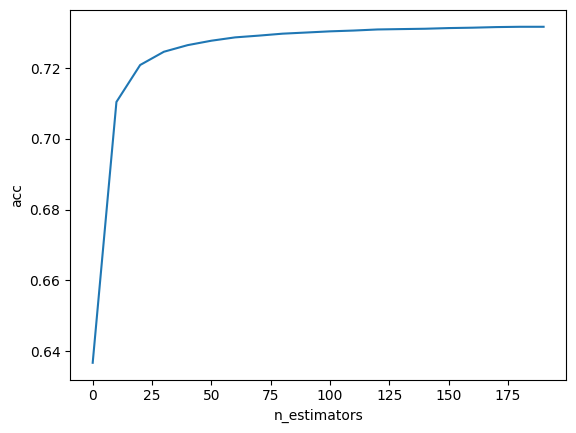

best n_estimators: 191


In [ ]:
# n_estimators

cross = []
for i  in range(0,200,10):
    rf = RandomForestClassifier(n_estimators=i+1, n_jobs=-1,random_state=1)
    cross_score = cross_val_score(rf, X_train, y_train, cv=5).mean()
    cross.append(cross_score)
plt.plot(range(0,200,10),cross)
plt.xlabel('n_estimators')
plt.ylabel('acc')
plt.show()
best_n_estimators = np.argmax(cross)*10+1
print('best n_estimators:', best_n_estimators)

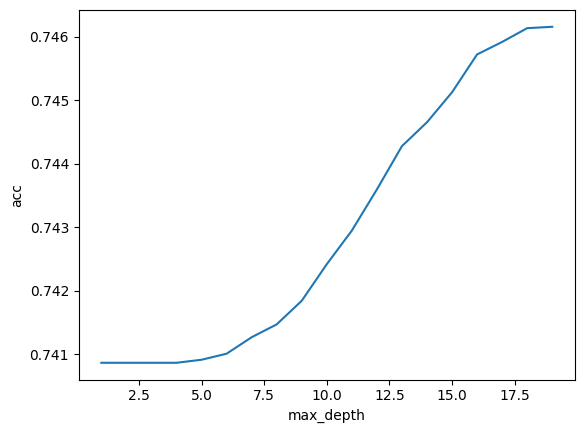

best max_depth: 19


In [ ]:
# max_depth
cross = []
for i  in range(1,20):
    rf = RandomForestClassifier(n_estimators=best_n_estimators,max_depth=i, n_jobs=-1,random_state=1)
    cross_score = cross_val_score(rf, X_train, y_train, cv=5).mean()
    cross.append(cross_score)
plt.plot(range(1,20),cross)
plt.xlabel('max_depth')
plt.ylabel('acc')
plt.show()
best_max_depth = np.argmax(cross)+1
print('best max_depth:', best_max_depth)

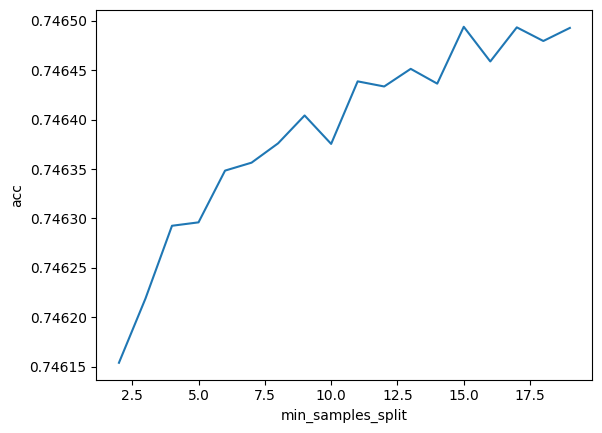

best min_samples_split: 15


In [ ]:
# min_samples_split
cross = []
for i  in range(2,20):
    rf = RandomForestClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth,min_samples_split=i, n_jobs=-1,random_state=1)
    cross_score = cross_val_score(rf, X_train, y_train, cv=5).mean()
    cross.append(cross_score)
plt.plot(range(2,20),cross)
plt.xlabel('min_samples_split')
plt.ylabel('acc')
plt.show()
best_min_samples_split = np.argmax(cross)+2
print('best min_samples_split:', best_min_samples_split)

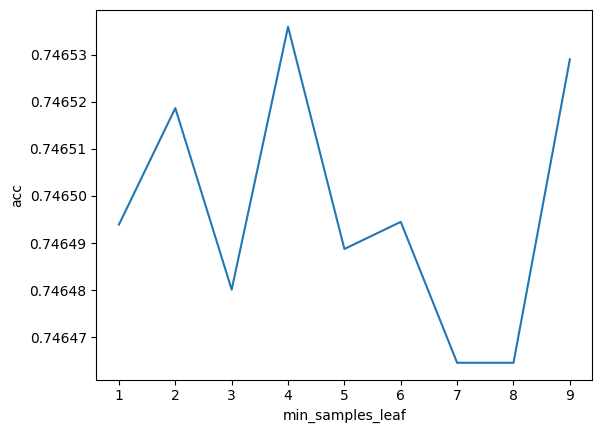

best min_samples_leaf: 4


In [ ]:
# min_samples_leaf
cross = []
for i  in range(1,10):
    rf = RandomForestClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth,min_samples_split=best_min_samples_split,min_samples_leaf=i, n_jobs=-1,random_state=1)
    cross_score = cross_val_score(rf, X_train, y_train, cv=5).mean()
    cross.append(cross_score)
plt.plot(range(1,10),cross)
plt.xlabel('min_samples_leaf')
plt.ylabel('acc')
plt.show()
best_min_samples_leaf = np.argmax(cross)+1
print('best min_samples_leaf:', best_min_samples_leaf)

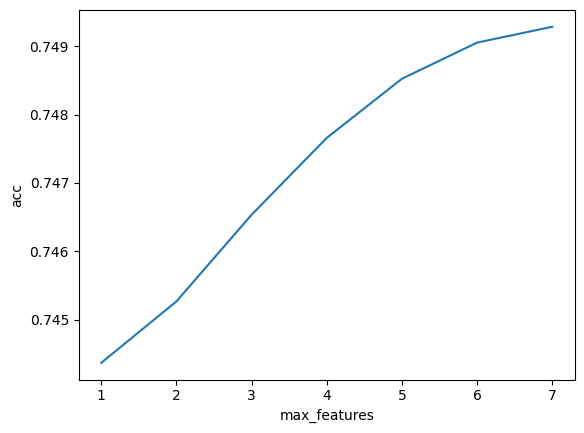

best max_features: 7


In [ ]:
# max_features
cross = []
for i  in range(1,8):
    rf = RandomForestClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth,min_samples_split=best_min_samples_split,min_samples_leaf=best_min_samples_leaf,max_features=i, n_jobs=-1,random_state=1)
    cross_score = cross_val_score(rf, X_train, y_train, cv=5).mean()
    cross.append(cross_score)
plt.plot(range(1,8),cross)
plt.xlabel('max_features')
plt.ylabel('acc')
plt.show()
best_max_features = np.argmax(cross)+1
print('best max_features:', best_max_features)

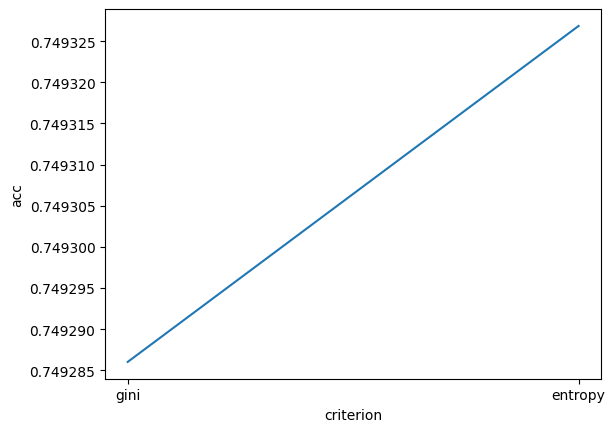

best criterion: entropy


In [ ]:
# criterion
cross = []
for i  in ['gini','entropy']:
    rf = RandomForestClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth,min_samples_split=best_min_samples_split,min_samples_leaf=best_min_samples_leaf,max_features=best_max_features,criterion=i, n_jobs=-1,random_state=1)
    cross_score = cross_val_score(rf, X_train, y_train, cv=5).mean()
    cross.append(cross_score)
plt.plot(['gini','entropy'],cross)
plt.xlabel('criterion')
plt.ylabel('acc')
plt.show()
best_criterion = np.argmax(cross)
print('best criterion:', ['gini','entropy'][best_criterion])

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn import metrics

rf = RandomForestClassifier(n_estimators=191,max_depth=19,min_samples_split=15,min_samples_leaf=4,max_features=7,criterion='entropy', n_jobs=-1,random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X1)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0]
